In [1]:
import numpy as np
import time
import math
import modules as md
import nbodysolver as nbs

#------------------------------------------------------------------------------------------
#Units and conversions:
#------------------------------------------------------------------------------------------
#code units: Rsun, Msun, G=1, ...
c_SI       = 299792458.0        #m/s
M_sun_SI   = 1.989*(10.**30.)   #kg
R_sun_SI   = 695800000.         #m
AU_SI      = 149597871000.      #m 
G_new_SI   = 6.67*(10.**(-11.)) #m**3 kg**(-1) s**(-2)
AU_U       = AU_SI/R_sun_SI                             #from dist AU to code units (U)
kmsec_U    = 1000./np.sqrt(G_new_SI*M_sun_SI/R_sun_SI)  #from vel km/sec to code units (U)
time_U     = np.sqrt((R_sun_SI**3)/(G_new_SI*M_sun_SI)) #from code units(U) to time sec
Rsch_1Msun_unitRsun = ((2.*G_new_SI*(1.*M_sun_SI))/(c_SI**2.))/R_sun_SI

## The units are $M_{\odot}$, $R_{\odot}$ , $G = 1$ 

## Define stars with different properties 

The coefficients for different equations of state are obtained by specifying the type of star, ("BH","NS","MS" or "WD")  

Particles contain information: name, mass, radi, spin, sdis = disruption spin, ntide = tidal coefficient, nspin = spin coefficient, info = information about the star 

In [2]:
#Main Sequence Stars
ms1 = md.Particle("MS",1,1, 0) #Type, mass, radius, spin
ms3 = md.Particle("MS",3,1.5, 0) 
ms5 = md.Particle("MS",5,3.5, 0) 
ms10 = md.Particle("MS", 10, 5.6, 0) 
#Let's add spin later

#Black holes
bh5 = md.Particle("BH", 5, 0, 0)
bh10 = md.Particle("BH", 10, 0, 0)

### Print some info 

In [3]:
print(ms1.name)
print(ms1.nspin)
print(ms5.nspin)
print(ms10.nspin)

MS
0.009628666666666666
5.057156270833333
53.02812693845331


##  Make Binaries

There is information about the binary:
period = period, 
orbd = orbital distance,
redvel = reduced velocity,
r = position,
v = velocity,
rochepri = Roche Lobe of the primary,
rochesec = Roche Lobe of the secondary,
rochefill = If one of the members has filled its Roche Lobe (True or False),
coll = collision,
tidalrpri = tidal disruption distance for primary,
tidalrsec = tidal disruption distance for secondary,

In [4]:
#Make binary MS1-BH5, MS3-BH5, MS5-BH5, MS5-BH10, MS10-BH10
#Eccentricity has not been implemented

ms1.spin = ms1.sdis/2 #Choose half the maximum spin for the star
bh5ms1 = md.Binary(bh5, ms1, 10, 0 ) ##primary, secondary, orbital distance (Rsun), eccentricity 

ms5.spin = ms5.sdis/2
bh10ms5 = md.Binary(bh10, ms5, 10, 0 )

ms10.spin = 2.*ms10.sdis/3
bh10ms10 = md.Binary(bh10, ms10, 20, 0 )

### Period 

In [5]:
print(bh5ms1.period)
print(bh10ms10.period)

1.4960180338232218
2.317621172249321


### Roche Lobe 

In [6]:
print(bh10ms10.rochepri)
print(bh10ms10.rochesec)
print(bh10ms10.rochefill)

7.578410367609127
7.578410367609127
False


## Measure contribution of corrections 

from 

$$
    m_{\star} \dot{\vec{v}} = -\frac{G m_{\star} m_{\bullet} \hat{r}}{r^2} - \frac{3 n_{\Omega} m_{\bullet} \Omega^2 \hat{r}}{2r^4} - \frac{9 n_{E} G^2 m^2_{\bullet} \hat{r}}{r^7}
$$

we substract the Newtonian part 

$$
    m_{\star} \dot{\vec{v}} = -\frac{G m_{\star} m_{\bullet} \hat{r}}{r^2} \left(1 + \frac{3 n_{\Omega} \Omega^2}{2 m_{\star}r^2} + \frac{9 n_{E}  m_{\bullet}}{m_{\star}r^5} \right) 
$$

Thus, we can evaluate the rest of the terms with respect to unity

## Spin contribution

In [7]:
print(bh5ms1.spineffsec)
print(bh10ms5.spineffsec)
print(bh10ms10.spineffsec)


3.610749999999999e-05
0.0004423168749999999
0.000503258311111111


## Tides contribution


In [10]:
print(bh5ms1.tideeffsec)
print(bh10ms5.tideeffsec)
print(bh10ms10.tideeffsec)

4.3329e-06
0.0009102881287499999
0.00014914160701439994


# Run simulation 

In [8]:
NP = 1 #Number of periods in code units you want to simulate
tfinal = NP*bh10ms10.periodct #Final time in code units
Nsteps = int(10*NP*tfinal) #Fix the first coefficient to change accuracy 
dt = tfinal/(Nsteps-1)  # fixed time step

r,v = nbs.Hermite4th(bh10,ms10, bh10ms10, Nsteps, dt)


No handles with labels found to put in legend.


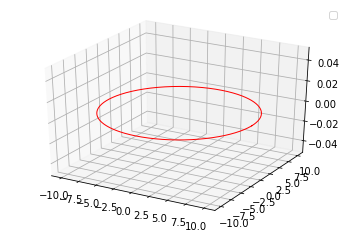

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'r', linewidth=1)# Plot the BH orbit
#ax.plot(r_res[1][0], r_res[1][1], r_res[1][2], 'b', linewidth=1)# Plot the star orbit
#ax.scatter3D(simulation[0][0][0], simulation[0][0][1], simulation[0][0][2], 'o', c='black') #s=100
#ax.scatter3D(simulation[2][0][0], simulation[2][0][1], simulation[2][0][2], 'o', c='black') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
#ax.set_xlabel('')
#ax.set_ylabel('')
#ax.set_zlabel('')


#plt.savefig('starbh-withoutspin.eps', format='eps')#, dpi=200

plt.show()